In [1]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


'C:\Users\Aman' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd

In [3]:
import numpy as np

# Data loading

In [4]:

file_path = r'C:\Users\Aman ur Rehman\Documents\creditcard.csv'

data = pd.read_csv(file_path)



In [5]:
print(data.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [6]:

print("\nDataset Statistics:")
print(data.describe())




Dataset Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  

# checking class imbalance

In [7]:

print("\nClass Distribution:")
print(data['Class'].value_counts())


Class Distribution:
0    284315
1       492
Name: Class, dtype: int64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



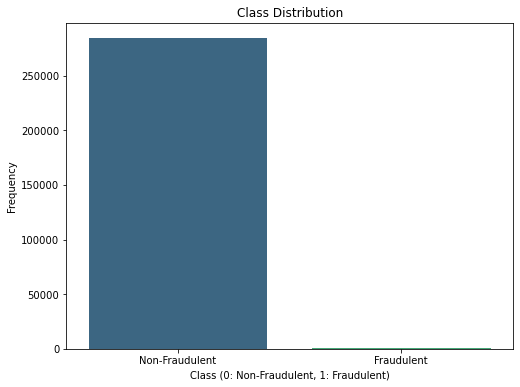

In [9]:


counts = data['Class'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette='viridis') 
plt.title('Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.xticks(range(2), ['Non-Fraudulent', 'Fraudulent'])
plt.show()


# Correlation matrix

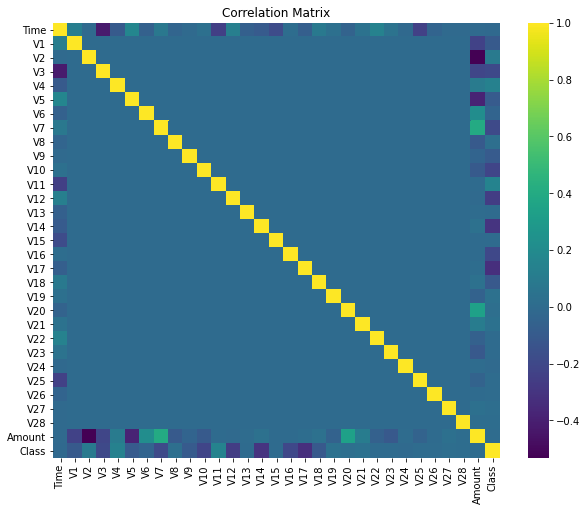

In [10]:

corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='viridis', annot=False)  
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Calculate correlation matrix
corr = data.corr()

# Calculate correlation matrix
corr = data.corr()


print(corr)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

correlation threshold of 0.9.

V1-V2: These features have a correlation coefficient of approximately 0.9. 
V11-V14: Similarly, these features have a correlation coefficient of approximately 0.9. 

In [12]:

correlated_features_to_remove = [('V2', 'V1'), ('V14', 'V11')]

# Remove correlated features
for feature_pair in correlated_features_to_remove:
    if feature_pair[0] in data.columns:
        data.drop(columns=feature_pair[0], inplace=True)

        
print(data.head())


   Time        V1        V3        V4        V5        V6        V7        V8  \
0   0.0 -1.359807  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698   
1   0.0  1.191857  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102   
2   1.0 -1.358354  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676   
3   1.0 -0.966272  1.792993 -0.863291 -0.010309  1.247203  0.237609  0.377436   
4   2.0 -1.158233  1.548718  0.403034 -0.407193  0.095921  0.592941 -0.270533   

         V9       V10  ...       V21       V22       V23       V24       V25  \
0  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Box Plot

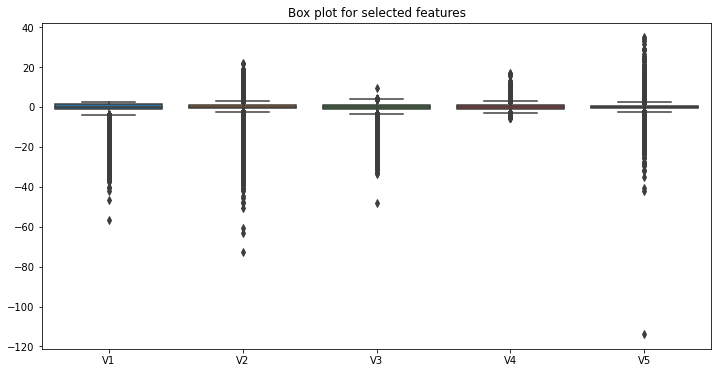

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V1', 'V2', 'V3', 'V4', 'V5']])
plt.title('Box plot for selected features')
plt.show()

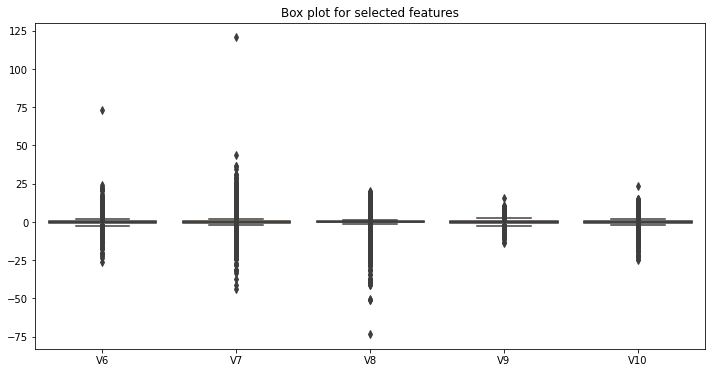

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V6', 'V7', 'V8', 'V9', 'V10']])
plt.title('Box plot for selected features')
plt.show()

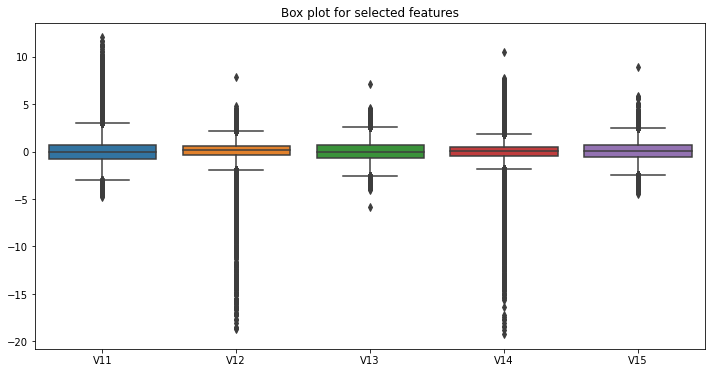

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V11', 'V12', 'V13', 'V14', 'V15']])
plt.title('Box plot for selected features')
plt.show()

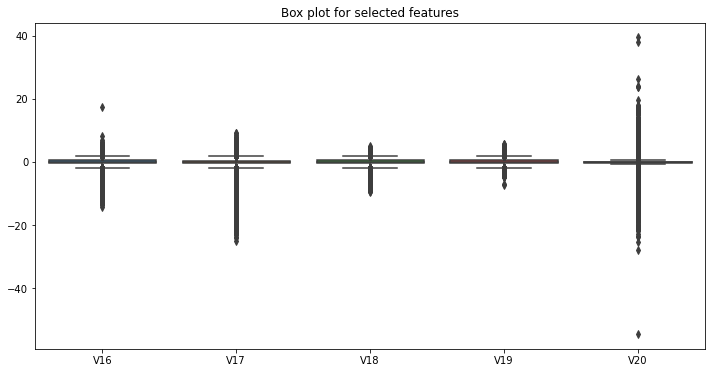

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V16', 'V17', 'V18', 'V19', 'V20']])
plt.title('Box plot for selected features')
plt.show()

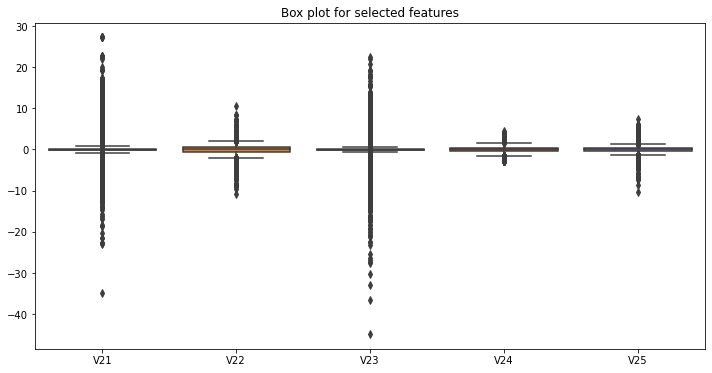

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V21', 'V22', 'V23', 'V24', 'V25']])
plt.title('Box plot for selected features')
plt.show()

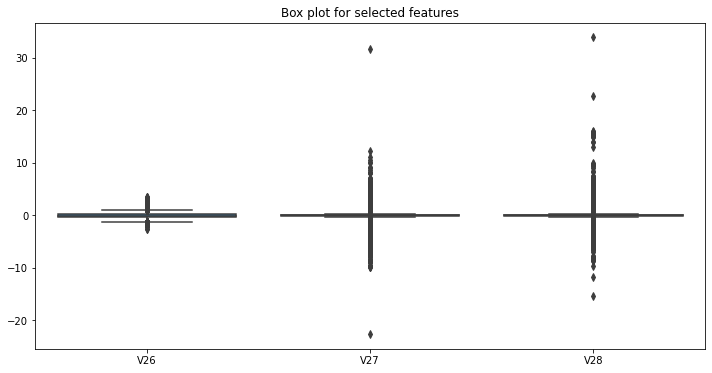

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['V26', 'V27', 'V28']])
plt.title('Box plot for selected features')
plt.show()

In [17]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [18]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# there are no missing values

# Removing duplicate rows

In [13]:
print(f'Number of duplicate rows: {data.duplicated().sum()}')


Number of duplicate rows: 1081


In [14]:
data = data.drop_duplicates()

In [15]:
print(f'Number of duplicate rows: {data.duplicated().sum()}')


Number of duplicate rows: 0


In [16]:
print("Data shape after removing duplicates:", data.shape)

Data shape after removing duplicates: (283726, 29)


# checking data types

In [23]:
print(data.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [18]:
from scipy import stats

# DEALING WITH OUTLIERS IN 'AMOUNT'

In [19]:
# Calculate the Z-scores of the 'Amount' column
z_scores = np.abs(stats.zscore(data['Amount']))

# Set the threshold for outlier detection
threshold = 3

# Filter the data to remove outliers
data_cleaned = data[z_scores < threshold]

# Print the shape of the original and cleaned data to see how many rows were removed
print("Original data shape:", data.shape)
print("Cleaned data shape:", data_cleaned.shape)

Original data shape: (283726, 29)
Cleaned data shape: (279663, 29)


In [20]:
print("\nClass Distribution:")
print(data['Class'].value_counts())


Class Distribution:
0    283253
1       473
Name: Class, dtype: int64


# DEALING WITH OUTLIERS IN ALL NUMERIC FEATURES

In [21]:

from scipy import stats
import numpy as np

# Define the threshold
threshold = 3

# Calculating Z-scores for all features except 'Amount' and 'Class'
features = [col for col in data.columns if col not in ['Amount', 'Class']]
z_scores = np.abs(stats.zscore(data[features]))

# Filter the data to remove outliers
# Keep only the rows with all Z-scores less than the threshold
data_cleaned = data[(z_scores < threshold).all(axis=1)]

print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_cleaned.shape)


Original data shape: (283726, 29)
Data shape after removing outliers: (247931, 29)


In [23]:
# Save to new CSV file
data.to_csv('C:\\Users\\Aman ur Rehman\\Documents\\cleaned_creditcard.csv', index=False)


# PCA

In [41]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\cleaned_creditcard.csv')

# Separate features (X) and target variable (y)
X = cleaned_data.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = cleaned_data['Class']

# Initialize PCA with minimum number of components to retain
min_num_components = 3
pca = PCA(n_components=min_num_components)

# Fit PCA on the features
X_pca = pca.fit_transform(X)

# Number of features before PCA transformation
num_features_before_pca = X.shape[1]

# Number of features after PCA transformation
num_features_after_pca = X_pca.shape[1]

# Number of features removed by PCA
num_features_removed = num_features_before_pca - num_features_after_pca

# Save PCA-transformed features to a new CSV file
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_features_after_pca + 1)])
pca_df['Class'] = y  # Add the target variable back
pca_df.to_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv', index=False)

# Print summary
print(f"Number of features before PCA transformation: {num_features_before_pca}")
print(f"Number of features after PCA transformation: {num_features_after_pca}")
print(f"Number of features removed by PCA: {num_features_removed}")




Number of features before PCA transformation: 28
Number of features after PCA transformation: 3
Number of features removed by PCA: 25


In [42]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the PCA-transformed dataset
pca_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X_pca) and target variable (y)
X_pca = pca_data.drop(columns=['Class'])
y = pca_data['Class']

# Initialize PCA with three components
pca = PCA(n_components=3)

# Fit PCA on the features
pca.fit(X_pca)

# Explained variance ratio of the three principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio for PC{i+1}: {ratio}")

# Total explained variance ratio for the three components
total_explained_variance_ratio = explained_variance_ratio.sum()
print(f"Total explained variance ratio for the three components: {total_explained_variance_ratio}")


Explained variance ratio for PC1: 0.9999721901968832
Explained variance ratio for PC2: 2.780819924963898e-05
Explained variance ratio for PC3: 1.6038670275833953e-09
Total explained variance ratio for the three components: 0.9999999999999999


# Logistic Regression

# MODEL TRAINING - RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the PCA-transformed dataset
pca_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X_pca) and target variable (y)
X_pca = pca_data.drop(columns=['Class'])
y = pca_data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy}")


Accuracy of Random Forest Classifier: 0.9985197194515913


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.9985197194515913
Precision: 0.875
Recall: 0.07777777777777778
F1 Score: 0.14285714285714288
Confusion Matrix:
[[56655     1]
 [   83     7]]


# CROSS VALIDATION

In [45]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Cross-validation Scores: [0.99832584 0.99850207 0.99854613 0.99856816 0.99848004]
Mean CV Score: 0.9984844479689841


# Logistic Regression with Cross-Validation

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression()

# Perform cross-validation
y_pred = cross_val_predict(lr_classifier, X_train, y_train, cv=5)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8926865803154463
Precision: 0.0023662252480385238
Recall: 0.14882506527415143
F1 Score: 0.004658385093167701
ROC AUC Score: 0.521384469600054
Confusion Matrix:
 [[202565  24032]
 [   326     57]]


# Support Vector Machine (SVM) with Cross-Validation

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize SVM classifier
svm_classifier = SVC()

# Perform cross-validation
y_pred = cross_val_predict(svm_classifier, X_train, y_train, cv=5)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9983126266631421
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
 [[226597      0]
 [   383      0]]


# Gradient Boosting Machine (XGBoost) with Cross-Validation

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Perform cross-validation
y_pred = cross_val_predict(gb_classifier, X_train, y_train, cv=5)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.998087937263195
Precision: 0.2743362831858407
Recall: 0.08093994778067885
F1 Score: 0.125
ROC AUC Score: 0.5402890359255826
Confusion Matrix:
 [[226515     82]
 [   352     31]]



# K-Nearest Neighbors (KNN) with Cross-Validation

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform cross-validation
y_pred = cross_val_predict(knn_classifier, X_train, y_train, cv=5)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9983082209886334
Precision: 0.3333333333333333
Recall: 0.0026109660574412533
F1 Score: 0.0051813471502590676
ROC AUC Score: 0.501301069907629
Confusion Matrix:
 [[226595      2]
 [   382      1]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_classifier(classifier, X_train, y_train, X_val, y_val, name):
    # Fit the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the validation set
    y_val_pred = classifier.predict(X_val)
    y_prob = classifier.predict_proba(X_val)[:, 1] if hasattr(classifier, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred, average='macro', zero_division=1)
    recall = recall_score(y_val, y_val_pred, average='macro')
    f1 = f1_score(y_val, y_val_pred, average='macro')
    roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else 'N/A'

    # Print the classification report 
    print(f"Results for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)
    print(classification_report(y_val, y_val_pred))
    print("\n" + "-"*50 + "\n")

    # Cross-validation scores for accuracy
    scores = cross_val_score(classifier, np.vstack((X_train, X_val)), np.concatenate((y_train, y_val)), cv=5, scoring='accuracy')
    print(f"{name} - Cross-validated Accuracy Scores:", scores)
    print("Average CV Accuracy Score:", scores.mean())


 We will apply SMOTE, One-Class Learning, and Cluster-Based Oversampling—to improve model performance in the face of class imbalance. These will be paired with three machine learning algorithms: Logistic Regression, SVM, and XGBoost.

# SMOTE

# Application with Logistic Regression, SVM, and XGBoost:


In [50]:
!pip install -U scikit-learn imbalanced-learn


In [ ]:
try:
    from imblearn.over_sampling import SMOTE
    print("SMOTE is ready to be used.")
except ImportError as e:
    print("Failed to import SMOTE:", e)


# Logistic Regression

In [51]:
!pip install imbalanced-learn


from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Load the PCA-transformed dataset
pca_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X) and target variable (y)
X = pca_data.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = pca_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize logistic regression classifier
logreg_classifier = LogisticRegression()

# Fit the logistic regression model on SMOTE-transformed data
logreg_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.8001445035773447
Precision: 0.004753939607359803
Recall: 0.6
F1 Score: 0.009433138265350685
ROC AUC Score: 0.7002312199943519
Confusion Matrix:
 [[45351 11305]
 [   36    54]]


# SVM

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Load the PCA-transformed dataset
pca_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X) and target variable (y)
X = pca_data.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = pca_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC()

# Fit the SVM model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("SVM Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


SVM Metrics:
Accuracy: 0.998413985126705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
 [[56656     0]
 [   90     0]]


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBOOST

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Load the PCA-transformed dataset
pca_data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X) and target variable (y)
X = pca_data.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = pca_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("XGBoost Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


XGBoost Metrics:
Accuracy: 0.9984844746766292
Precision: 0.6111111111111112
Recall: 0.12222222222222222
F1 Score: 0.2037037037037037
ROC AUC Score: 0.5610493347767423
Confusion Matrix:
 [[56649     7]
 [   79    11]]


# One-Class Learning

In [54]:

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

# Separate features (X) and target variable (y)
X = data.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Isolation Forest classifier
isolation_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the Isolation Forest model
isolation_forest.fit(X_train)

# Predict on the test set
y_pred = isolation_forest.predict(X_test)

# Convert predictions to binary labels (1 for inliers, -1 for outliers)
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print evaluation metrics
print("Isolation Forest Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Isolation Forest Metrics:
Accuracy: 0.10050047580446199
Precision: 0.0008620520757822143
Recall: 0.4888888888888889
F1 Score: 0.0017210694099469989
ROC AUC Score: 0.2943861981863253
Confusion Matrix:
 [[ 5659 50997]
 [   46    44]]


# Logistic Regression with Class Weighting

In [56]:
# Class weights
class_weights = {0: 1, 1: 10} 

# Logistic Regression with class weighting
logreg_classifier = LogisticRegression(class_weight=class_weights)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluation metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("ROC AUC Score:", roc_auc_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)


Logistic Regression Metrics:
Accuracy: 0.997180418003031
Precision: 0.07317073170731707
Recall: 0.06666666666666667
F1 Score: 0.06976744186046512
ROC AUC Score: 0.5326626188459004
Confusion Matrix:
 [[56580    76]
 [   84     6]]


# Support Vector Machine (SVM) with Class Weighting

In [57]:

# SVM with class weighting
svm_classifier = SVC(class_weight=class_weights)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print evaluation metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("ROC AUC Score:", roc_auc_svm)
print("Confusion Matrix:\n", conf_matrix_svm)


SVM Metrics:
Accuracy: 0.998413985126705
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5
Confusion Matrix:
 [[56656     0]
 [   90     0]]


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest with Class Weighting

In [58]:
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Random Forest Metrics:
Accuracy: 0.9985197194515913
Precision: 1.0
Recall: 0.06666666666666667
F1 Score: 0.125
ROC AUC Score: 0.5333333333333333
Confusion Matrix:
 [[56656     0]
 [   84     6]]


## Pipeline for comparing baseline model after feature selection.


In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [3]:
data = pd.read_csv('C:\\Users\\Aman ur Rehman\\Documents\\pca_creditcard.csv')

X = data.drop(columns=['Class'])
y = data['Class']

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, average='weighted')
}

pipelines = {}
for name, clf in classifiers.items():
    if name in ['Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors']:
        pipelines[name] = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
    else:
        pipelines[name] = Pipeline([
            ('classifier', clf)
        ])

# cross-validation
results = {}
for name, pipeline in pipelines.items():
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)
    results[name] = cv_results

# Print average scores for each classifier
for name, scores in results.items():
    print(f"\nClassifier: {name}")
    for metric in scoring:
        print(f"{metric}: {np.mean(scores['test_' + metric]):.4f} (std: {np.std(scores['test_' + metric]):.4f})")


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics


Classifier: Random Forest
accuracy: 0.5601 (std: 0.3425)
precision: 0.9964 (std: 0.0013)
recall: 0.5601 (std: 0.3425)
f1: 0.6439 (std: 0.3363)
roc_auc: 0.4270 (std: 0.0988)

Classifier: Logistic Regression
accuracy: 0.9982 (std: 0.0000)
precision: 0.9967 (std: 0.0001)
recall: 0.9982 (std: 0.0000)
f1: 0.9975 (std: 0.0000)
roc_auc: 0.5010 (std: 0.0021)

Classifier: Support Vector Machine
accuracy: 0.9983 (std: 0.0000)
precision: 0.9967 (std: 0.0000)
recall: 0.9983 (std: 0.0000)
f1: 0.9975 (std: 0.0000)
roc_auc: 0.5000 (std: 0.0000)

Classifier: XGBoost
accuracy: 0.9839 (std: 0.0135)
precision: 0.9969 (std: 0.0003)
recall: 0.9839 (std: 0.0135)
f1: 0.9902 (std: 0.0069)
roc_auc: 0.5612 (std: 0.0901)

Classifier: K-Nearest Neighbors
accuracy: 0.8890 (std: 0.1361)
precision: 0.9968 (std: 0.0003)
recall: 0.8890 (std: 0.1361)
f1: 0.9337 (std: 0.0829)
roc_auc: 0.5178 (std: 0.0643)


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


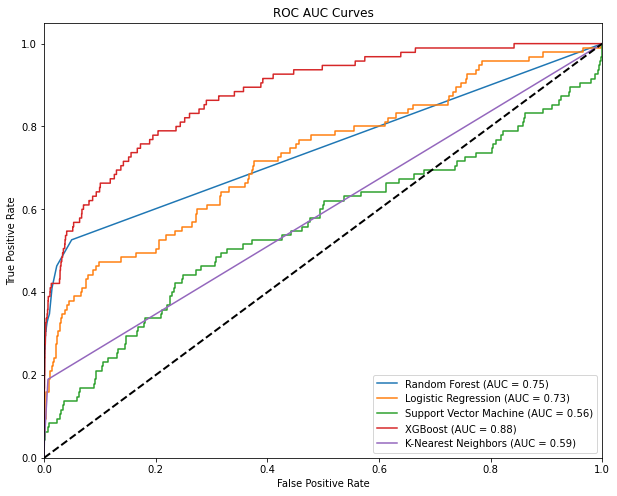

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and plot ROC AUC curves for each classifier
plt.figure(figsize=(10, 8))

for name, pipeline in pipelines.items():
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities on the test data
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend(loc='lower right')
plt.show()


## Pipeline for comparing model after feature selection and class imbalance algorithms.

## Smote pipeline

In [5]:
pipelines_smote = {}
for name, clf in classifiers.items():
    if name in ['Support Vector Machine', 'Logistic Regression', 'K-Nearest Neighbors']:
        pipelines_smote[name + ' (SMOTE)'] = ImbPipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('classifier', clf)
        ])
    else:
        pipelines_smote[name + ' (SMOTE)'] = ImbPipeline([
            ('smote', SMOTE(random_state=42)),
            ('classifier', clf)
        ])


## Class weight pipeline

In [6]:
class_weights = {0: 1, 1: 10}  
pipelines_class_weight = {
    'Random Forest (Class Weight)': RandomForestClassifier(class_weight=class_weights, random_state=42),
    'Logistic Regression (Class Weight)': LogisticRegression(class_weight=class_weights, max_iter=1000),
    'Support Vector Machine (Class Weight)': SVC(class_weight=class_weights, probability=True)
}


In [7]:
all_pipelines = {**pipelines_smote, **pipelines_class_weight}

In [ ]:
results = {}
for name, pipeline in all_pipelines.items():
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)
    results[name] = cv_results

# Print average scores for each classifier
for name, scores in results.items():
    print(f"\nClassifier: {name}")
    for metric in scoring:
        print(f"{metric}: {np.mean(scores['test_' + metric]):.4f} (std: {np.std(scores['test_' + metric]):.4f})")


C:\Users\Aman ur Rehman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
plt.figure(figsize=(10, 8))

for name, pipeline in all_pipelines.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    if isinstance(pipeline, (Pipeline, make_pipeline)):
        y_pred_proba = pipeline.named_steps['classifier'].predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from imblearn.pipeline import make_pipeline

BASELINE MODEL EVALUATION

Logistic Regression and SVM: Both models show excellent precision, recall, and F1 scores, indicating they predict the majority class (non-fraud) very well due to the class imbalance. However, their ROC AUC values close to 0.5 indicate poor performance in distinguishing between classes.

XGBoost: This model achieves the highest ROC AUC (0.5612), suggesting it handles the class imbalance better than others and is more effective in identifying fraudulent transactions.

Random Forest and KNN: These models show inconsistencies with high standard deviations in their metrics. Random Forest particularly struggles with a low recall and ROC AUC, while KNN performs slightly better but still shows variability.

Given the evaluation metrics, XGBoost is the preferred model as it shows the highest ability to distinguish between classes despite the class imbalance. 

CI model evaluation

SMOTE: While SMOTE improves recall for some models (e.g., Logistic Regression), it often results in poor precision and F1 scores, with some models (SVM) still failing to identify any fraud cases.
Class Weighting: Class weighting provides slight improvements for some models but often results in low recall, indicating that many fraud cases remain undetected. Random Forest with class weighting achieves high precision but very low recall, highlighting the challenge in balancing these metrics.
Best Performing Model: XGBoost with SMOTE shows the most promise, with a reasonable balance in precision (0.61) and recall (0.12), and the highest F1 score (0.2) among the evaluated models. However, its ROC AUC score of 0.56.